In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 4)
y shape: (150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (105, 4)
Test: (45, 4)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
y_pred_lr = log_reg.predict(X_test_scaled)

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))


Accuracy Logistic Regression: 1.0
Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [7]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    print(f"k={k} -> accuracy={acc:.3f}")


k=1 -> accuracy=0.978
k=3 -> accuracy=1.000
k=5 -> accuracy=1.000
k=7 -> accuracy=1.000
k=9 -> accuracy=1.000


In [8]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred_rf = rf.predict(X_test)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy Random Forest: 1.0
Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [10]:
for feature, importance in zip(iris.feature_names, rf.feature_importances_):
    print(f"{feature}: {importance:.3f}")


sepal length (cm): 0.104
sepal width (cm): 0.045
petal length (cm): 0.417
petal width (cm): 0.434


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


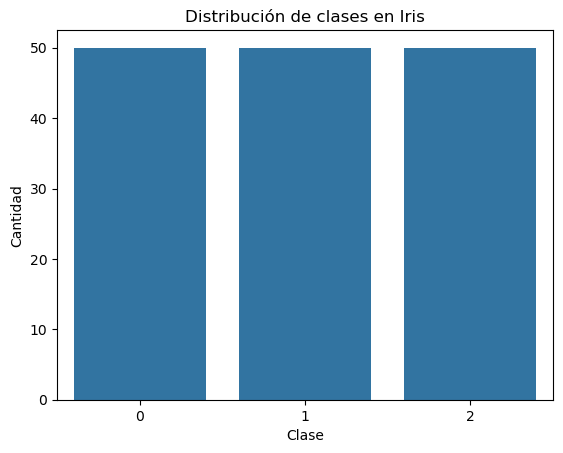

In [12]:
sns.countplot(x=y)
plt.title("Distribución de clases en Iris")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


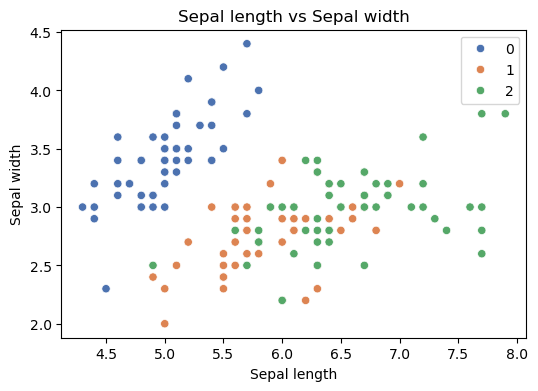

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=X[:, 0],  # sepal length
    y=X[:, 1],  # sepal width
    hue=y,
    palette="deep"
)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal length vs Sepal width")
plt.show()


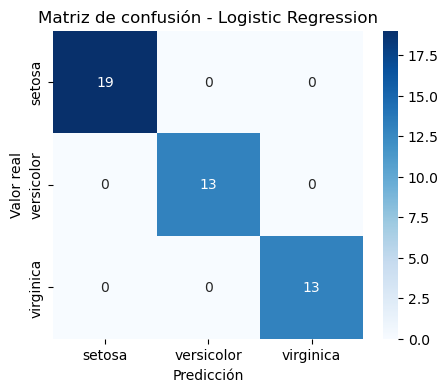

In [14]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Logistic Regression")
plt.show()


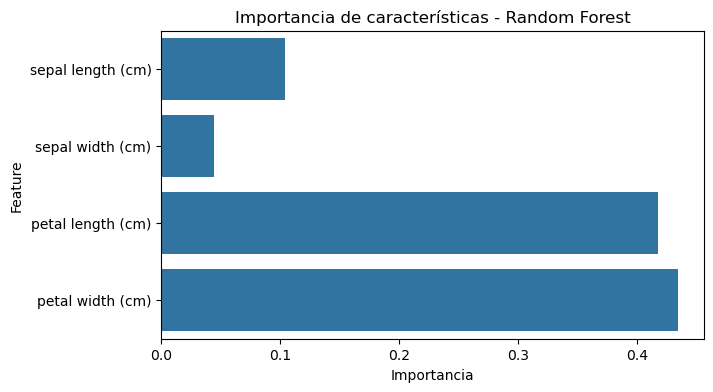

In [15]:
importances = rf.feature_importances_

plt.figure(figsize=(7, 4))
sns.barplot(
    x=importances,
    y=iris.feature_names
)
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.show()


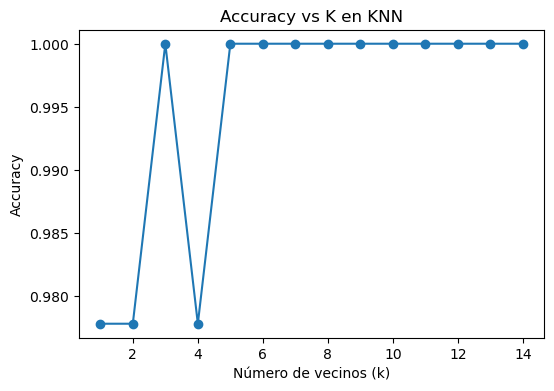

In [16]:
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K en KNN")
plt.show()
